In [1]:
using Random, Plots, LinearAlgebra
import Statistics

In [2]:
struct WienerProcess
    #the two key things to know are 
    path::Vector{Float64}
    Δt::Float64
   
    #This creates a wiener process using a given path, while 
    #enforcing the invariant that a WienerProcess starts at zero
    WienerProcess(p,d) = p[1] != 0.0 ? new(vcat(0.0,p),d) : new(p,d)
end
#Generators
function WienerProcess(size::Int, domain_length::Float64)
    #This function builds a wiener process out of randomly drawn steps
    #it uses the domain length to calculate Δt
    
    #TODO: implement checking for begining with zero
    return WienerProcess(cumsum(randn(size)),domain_length/size)
end

WienerProcess

In [3]:
#Adding methods (not as member functions though)
function get_steps(p::WienerProcess)
    #This pulls the steps out of the WienerProcess
    len = length(p.path)
    if p.path[1] != 0.0
        error("test")
    end 
    steps = p.path[2:len] - p.path[1:len-1]
end

function refine(p::WienerProcess)
    #This refines the resolution of the given WienerProcess, and returns another in it's stead
    len = length(p.path)
    arr = zeros(2*len-1)
    
    for ind in 1:len-1
        arr[2*ind-1] = p.path[ind]
        arr[2*ind] =  (0.5 * (p.path[ind] + p.path[ind+1]) .+ (((√p.Δt)/2)*randn(1)))[1]
    end
    arr[2*len-1] = p.path[len]
    
    return WienerProcess(arr, p.Δt/2)
end

function spread_walk(p::WienerProcess)
    len = length(p.path)
    arr = zeros(2*len-1)
    
    for ind in 1:len-1
        arr[2*ind-1] = p.path[ind]
        arr[2*ind] =  (0.5 * (p.path[ind] + p.path[ind+1]) ) 
    end
    arr[2*len-1] = p.path[len]
    
    return WienerProcess(arr,Δt/2)
end

spread_walk (generic function with 1 method)

In [28]:
N = 5000;
T = 1.0;
Δt=T/N;

Wₜ = WienerProcess(N,Δt);

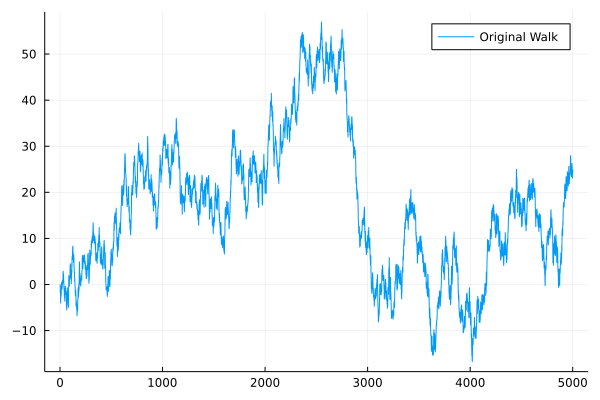

In [29]:
#plot(
#    Wₜ.path #yaxis
#    ,labels="Original Walk"
#)

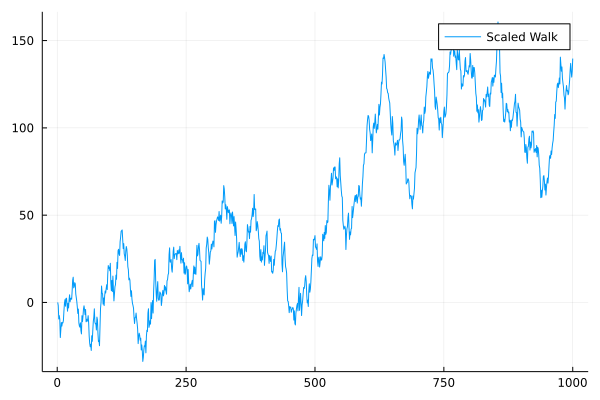

In [30]:
#plot(
#    Wₜ.path[1:round(Int,N/5)] .* 5 #yaxis
#    ,labels="Scaled Walk"
#)